# Env Setup

Import libraries

In [1]:
import pandas as pd
import json
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import kmeans2, whiten

Input from open data 

In [10]:
data = pd.read_csv("311pol.csv")
print(data.head())
list(data.columns.values)

      CASE ID SOURCE            DEPARTMENT                  WORK GROUP  \
0  2017159125  EMAIL  City Managers Office  City Managers Office-KCPD-   
1  2017158575    WEB  City Managers Office  City Managers Office-KCPD-   
2  2017157533  PHONE  City Managers Office  City Managers Office-KCPD-   
3  2017157669  PHONE  City Managers Office  City Managers Office-KCPD-   
4  2017156973    WEB  City Managers Office  City Managers Office-KCPD-   

                         REQUEST TYPE       CATEGORY    TYPE         DETAIL  \
0  Public Safety-Police-Homeless camp  Public Safety  Police  Homeless Camp   
1  Public Safety-Police-Homeless camp  Public Safety  Police  Homeless Camp   
2  Public Safety-Police-Homeless camp  Public Safety  Police  Homeless Camp   
3          Public Safety-Police-Other  Public Safety  Police          Other   
4  Public Safety-Police-Homeless camp  Public Safety  Police  Homeless Camp   

  CREATION DATE CREATION TIME            ...             ZIP CODE  \
0    12/26/

['CASE ID',
 'SOURCE',
 'DEPARTMENT',
 'WORK GROUP',
 'REQUEST TYPE',
 'CATEGORY',
 'TYPE',
 'DETAIL',
 'CREATION DATE',
 'CREATION TIME',
 'CREATION MONTH',
 'CREATION YEAR',
 'STATUS',
 'EXCEEDED EST TIMEFRAME',
 'CLOSED DATE',
 'CLOSED MONTH',
 'CLOSED YEAR',
 'DAYS TO CLOSE',
 'STREET ADDRESS',
 'ADDRESS WITH GEOCODE',
 'ZIP CODE',
 'NEIGHBORHOOD',
 'COUNTY',
 'COUNCIL DISTRICT',
 'POLICE DISTRICT',
 'PARCEL ID NO',
 'LATITUDE',
 'LONGITUDE',
 'CASE URL',
 '30-60-90 Days Open Window']

# Slice dataframe to prep for analysis

Slice (Case_ID, Council District, Police District)

In [3]:
dslice = data[['CASE ID','COUNCIL DISTRICT','POLICE DISTRICT','LATITUDE','LONGITUDE']]
print(dslice.head())

      CASE ID  COUNCIL DISTRICT POLICE DISTRICT   LATITUDE  LONGITUDE
0  2017159125                 4         Central  39.042984 -94.590899
1  2017158575                 4         Central  39.075416 -94.606640
2  2017157533                 5           Metro  38.992026 -94.563740
3  2017157669                 6           South  38.911625 -94.530860
4  2017156973                 3         Central  39.062539 -94.569095


# Analysis

K-Means Clustering for police complaints

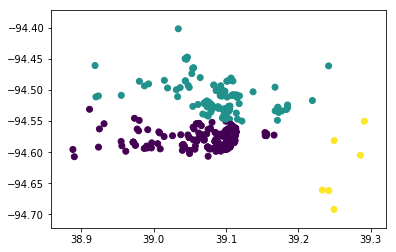

In [4]:
latlongdf = data[['LATITUDE','LONGITUDE']]
latlong = latlongdf.values
x, y = kmeans2(whiten(latlong), 3, iter = 20)  
plt.scatter(latlong[:,0], latlong[:,1], c=y);
plt.show()

Police complaints by council data

In [7]:
by_precinct = data.groupby('COUNCIL DISTRICT')['CASE ID'].nunique()
print(by_precinct)

COUNCIL DISTRICT
1     13
2      5
3    115
4    120
5     17
6     26
Name: CASE ID, dtype: int64
